<a href="https://colab.research.google.com/github/Boshra-01/Healthcare_NoShow_Prediction_ML_Model/blob/main/Healthcare_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Healthcare-ML Model/cleaned_no_show_records.csv')

In [4]:
print(df.head())

      patientid  appointmentid gender scheduledday appointmentday  age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       neighbourhood  scholarship  hypertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handicap  sms_received  no_show  daysWait appointment_dow age_group  \
0         0             0        0        

**Exploratory Data Analysis (EDA)**

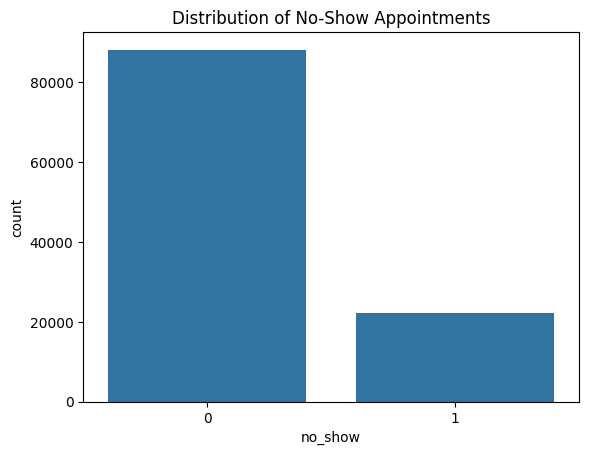

In [5]:
sns.countplot(x='no_show', data=df)
plt.title('Distribution of No-Show Appointments')
plt.show()

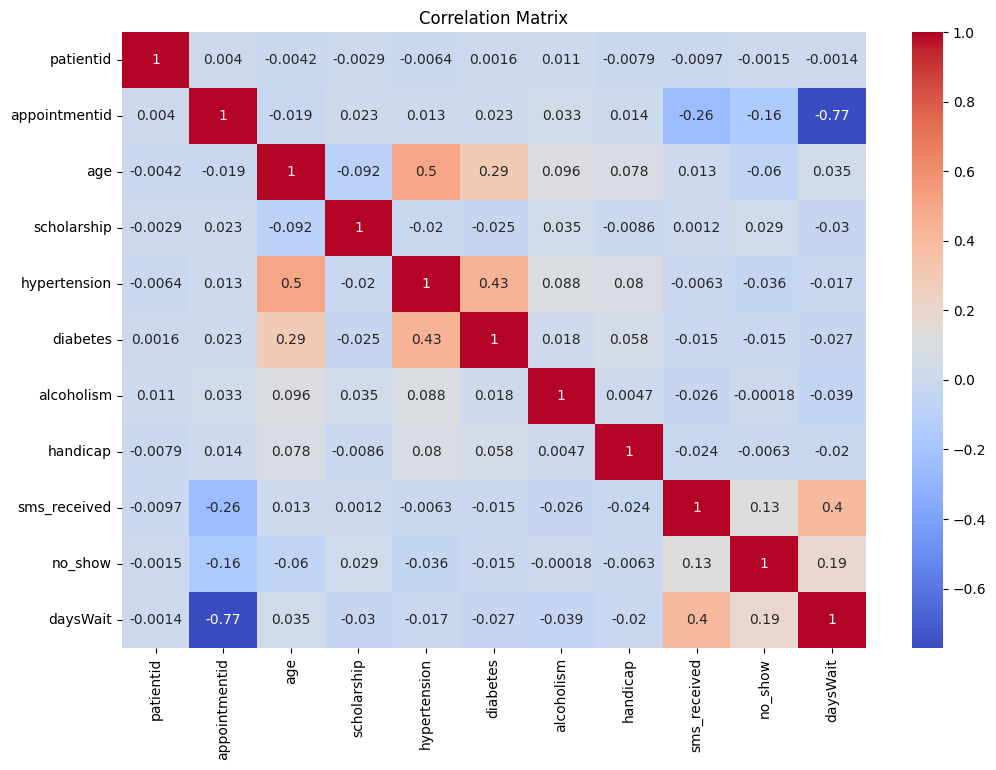

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Encoding Categorical Columns**

Convert Dates to Numeric Feature. Extract meaningful information from the date columns:

In [7]:
# Define X first by dropping the target variable
X = df.drop(columns=['no_show']).copy()

# Convert to datetime
X['scheduledday'] = pd.to_datetime(X['scheduledday'])
X['appointmentday'] = pd.to_datetime(X['appointmentday'])

# Extract day and month
X['scheduled_day'] = X['scheduledday'].dt.day
X['scheduled_month'] = X['scheduledday'].dt.month
X['appointment_day'] = X['appointmentday'].dt.day
X['appointment_month'] = X['appointmentday'].dt.month

# Drop original date columns
X.drop(columns=['scheduledday', 'appointmentday'], inplace=True)


X.head()


,patientid,appointmentid,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,daysWait,appointment_dow,age_group,appointment_day,scheduled_day,scheduled_month,appointment_month
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,senior,29,29,4,4
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,adult,29,29,4,4
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,senior,29,29,4,4
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,child,29,29,4,4
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,adult,29,29,4,4


**Identify Categorical Columns:**

In [8]:
print(X.dtypes)

patientid            float64
appointmentid          int64
gender                object
age                    int64
neighbourhood         object
scholarship            int64
hypertension           int64
diabetes               int64
alcoholism             int64
handicap               int64
sms_received           int64
daysWait               int64
appointment_dow       object
age_group             object
appointment_day        int32
scheduled_day          int32
scheduled_month        int32
appointment_month      int32
dtype: object


**Encode Categorical Variables**

In [9]:
print(X.columns)


Index(['patientid', 'appointmentid', 'gender', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'daysWait', 'appointment_dow', 'age_group',
       'appointment_day', 'scheduled_day', 'scheduled_month',
       'appointment_month'],
      dtype='object')


Label Encoding for gender (since it has only M and F):

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['gender'] = label_encoder.fit_transform(X['gender'])  # F - 0, M - 1


One-Hot Encoding for categorical variables with many unique values (like neighbourhood, appointment_dow, age_group):

In [11]:
X = pd.get_dummies(X, columns=['neighbourhood', 'appointment_dow', 'age_group'], drop_first=True)


**Model Selection + Splitting and Scaling**

In [12]:
# Define the target variable 'no_show'
y = df['no_show']

# Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Evaluate the Model**

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Making predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy is: {accuracy:.4f} !!')

# Classification Report
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

Accuracy is: 0.8085 !!

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.97      0.89     26540
           1       0.58      0.15      0.23      6617

    accuracy                           0.81     33157
   macro avg       0.70      0.56      0.56     33157
weighted avg       0.77      0.81      0.76     33157



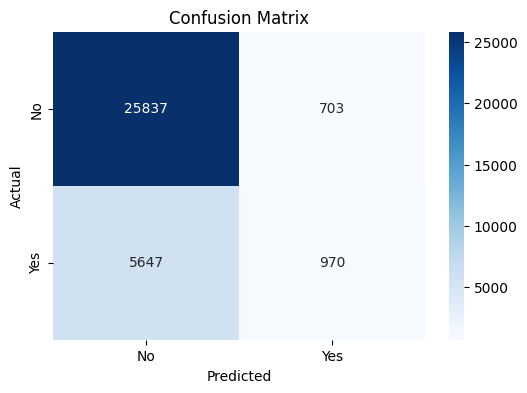

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Save the Model for Future Use**

In [15]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')
print("ML Model saved as random_forest_model.pkl")


ML Model saved as random_forest_model.pkl
